# Capston Project WebScraping- Data Extraction and Text Analysis 
##### Kumar Gaurav

#### GitHub Profile With Various Projects

In [1]:
import webbrowser
urls = ['https://github.com/kumarg160491?tab=repositories']
for url in urls:
    webbrowser.open_new_tab(url)

In [2]:
from IPython.core.display import HTML

HTML('<a href="https://github.com/kumarg160491?tab=repositories">link</a>')

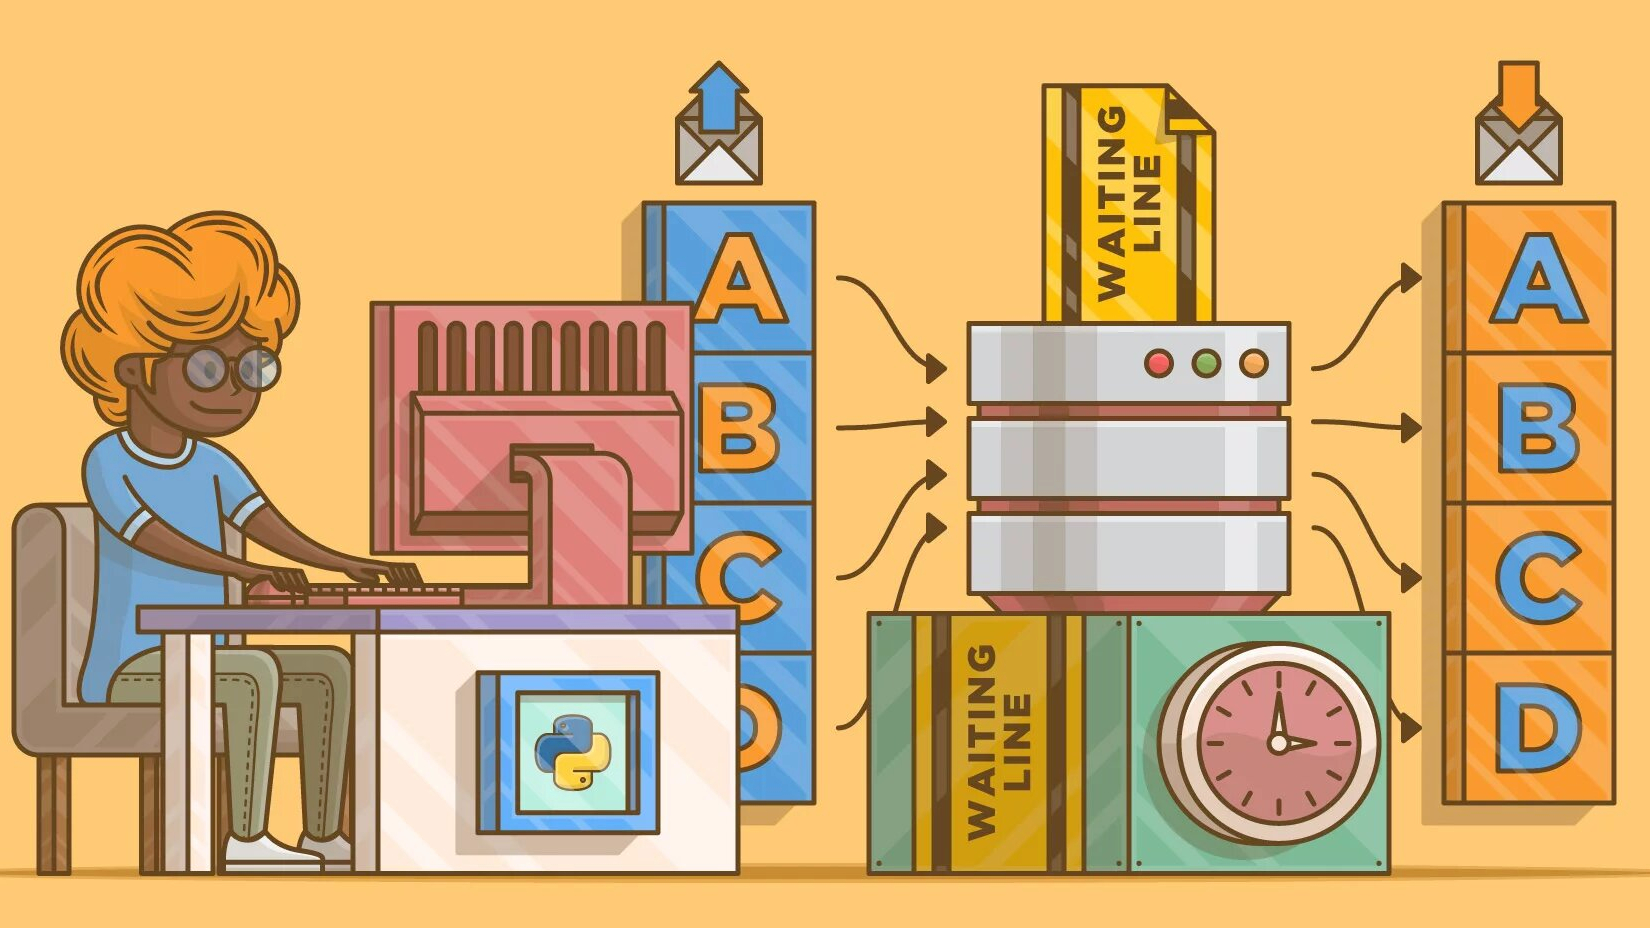

In [3]:
from PIL import Image
read_image=Image.open('Text Analysis.png')
read_image

Objective:

This assignment is to extract some sections (which are mentioned below) from SEC / EDGAR financial reports and perform text analysis to compute variables.

Variables:

“Text Analysis.docx” you need to compute following: 

Section 1: Positive score, negative score, polarity score

Section 2: Average Sentence Length, percentage of complex words, fog index

Section 4: Complex word count

Section 5: Word count
 
In addition to these eight variables, compute two more items: “uncertainty” and “constraining”. These variables are calculated similar to the ones in Section 1 or Section 4. Attached the lists of words that are classified as uncertain or constraining.

For uncertainty: “uncertainty_dictionary.xlsx”

For constraining: “constraining_dictionary.xlsx”
 
That means you need to collect/compute minimum 10 variables in total.

#### Importing Libraries

In [4]:
'''Need Libraries to Install'''
#!pip install nltk
# nltk.download()
#!pip install selenium
#!pip install textblob
#!pip install wordcloud

'Need Libraries to Install'

In [5]:
import pandas as pd
import numpy as np
from selenium import webdriver
import bs4 as bs
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()


#### Loading Data


In [6]:
data=pd.read_csv('Problem_Link.csv')
data.head()

,FYRMO,FDATE,FORM,SECFNAME,SECFNAME_URL
0,199803.0,06/03/1998,10-K405,edgar/data/3662/0000950170-98-000413.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
1,199805.0,15/05/1998,10-Q,edgar/data/3662/0000950170-98-001001.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
2,199808.0,13/08/1998,NT 10-Q,edgar/data/3662/0000950172-98-000783.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
3,199811.0,12/11/1998,10-K/A,edgar/data/3662/0000950170-98-002145.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
4,199811.0,16/11/1998,NT 10-Q,edgar/data/3662/0000950172-98-001203.txt,https://www.sec.gov/Archives/edgar/data/3662/0...


#### Read the Sample URL - Click on the Link Below

In [7]:

from IPython.core.display import HTML

HTML('<a href="https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-000413.txt">link</a>')


#### Reading URL from column


In [8]:
'''Select the URL number within 30 to read the data'''

from urllib.request import urlopen

num=int(input('Enter number between 1 to 30 :'))

my_files=[]
for link in data.SECFNAME_URL[0:num]:  
    with urlopen(link) as response:
        myfile = response.read()
        print(myfile)
        my_files.append(myfile)

Enter number between 1 to 30 :1
b'-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc-Type: 2001,MIC-CLEAR\nOriginator-Name: webmaster@www.sec.gov\nOriginator-Key-Asymmetric:\n MFgwCgYEVQgBAQICAf8DSgAwRwJAW2sNKK9AVtBzYZmr6aGjlWyK3XmZv3dTINen\n TWSM7vrzLADbmYQaionwg5sDW3P6oaM5D3tdezXMm7z1T+B+twIDAQAB\nMIC-Info: RSA-MD5,RSA,\n EvPdKfnjzBIjWkEk2RgNCk1/52qXomHpN+LDwL/XTT/XBuAzk70AYYrsxlQbyiqr\n V5559QRyTgPe9PfVt0db9Q==\n\n<SEC-DOCUMENT>0000950170-98-000413.txt : 19980309\n<SEC-HEADER>0000950170-98-000413.hdr.sgml : 19980309\nACCESSION NUMBER:\t\t0000950170-98-000413\nCONFORMED SUBMISSION TYPE:\t10-K405\nPUBLIC DOCUMENT COUNT:\t\t21\nCONFORMED PERIOD OF REPORT:\t19971228\nFILED AS OF DATE:\t\t19980306\nSROS:\t\t\tNYSE\n\nFILER:\n\n\tCOMPANY DATA:\t\n\t\tCOMPANY CONFORMED NAME:\t\t\tSUNBEAM CORP/FL/\n\t\tCENTRAL INDEX KEY:\t\t\t0000003662\n\t\tSTANDARD INDUSTRIAL CLASSIFICATION:\tELECTRIC HOUSEWARES & FANS [3634]\n\t\tIRS NUMBER:\t\t\t\t251638266\n\t\tSTATE OF INCORPORATION:\t\t\tDE\n\t\tFISCAL Y

#### Converting data to string

In [9]:
my_files=[x.decode('utf-8') for x in my_files]

#### Converted data to string type List

In [10]:
type(my_files)

list

#### Verifying data

In [11]:
my_files=my_files[0]

#### Importing Word Lemmatizer

In [12]:
from nltk.stem import WordNetLemmatizer
import re
wnl=WordNetLemmatizer()

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenize data

In [14]:
sentence=nltk.sent_tokenize(my_files)

#### Cleaning data using Stopwords

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/kumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
corpus=[]
for i in range(len(sentence)):
    review= re.sub("[^a-zA-Z]"," ", sentence[i])
    review=review.lower()  
    review=review.split()
    review=[wnl.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    corpus.append(review)


#### Counting of Words

In [18]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

print( word_count(corpus[0]))

{'begin': 1, 'privacy': 1, 'enhanced': 1, 'message': 1, 'proc': 1, 'type': 4, 'mic': 2, 'clear': 1, 'originator': 2, 'name': 4, 'webmaster': 1, 'www': 1, 'sec': 6, 'gov': 1, 'key': 2, 'asymmetric': 1, 'mfgwcgyevqgbaqicaf': 1, 'dsgawrwjaw': 1, 'snkk': 1, 'avtbzyzmr': 1, 'agjlwyk': 1, 'xmzv': 1, 'dtinen': 1, 'twsm': 1, 'vrzladbmyqaionwg': 1, 'sdw': 1, 'p': 1, 'oam': 1, 'tdezxmm': 1, 'z': 1, 'b': 1, 'twidaqab': 1, 'info': 1, 'rsa': 2, 'md': 1, 'evpdkfnjzbijwkek': 1, 'rgnck': 1, 'qxomhpn': 1, 'ldwl': 1, 'xtt': 1, 'xbuazk': 1, 'ayyrsxlqbyiqr': 1, 'v': 1, 'qrytgpe': 1, 'pfvt': 1, 'db': 1, 'q': 1, 'document': 3, 'txt': 1, 'header': 2, 'hdr': 1, 'sgml': 1, 'accession': 1, 'number': 4, 'conformed': 4, 'submission': 1, 'k': 4, 'public': 1, 'count': 1, 'period': 2, 'report': 3, 'filed': 1, 'date': 2, 'sros': 1, 'nyse': 1, 'filer': 1, 'company': 4, 'data': 1, 'sunbeam': 2, 'corp': 1, 'fl': 3, 'central': 1, 'index': 1, 'standard': 1, 'industrial': 1, 'classification': 1, 'electric': 1, 'housewares'


#### Total Word Count

In [19]:
for new_corpus in corpus:
    new_corpus=word_count(new_corpus)
    print(new_corpus)

{'begin': 1, 'privacy': 1, 'enhanced': 1, 'message': 1, 'proc': 1, 'type': 4, 'mic': 2, 'clear': 1, 'originator': 2, 'name': 4, 'webmaster': 1, 'www': 1, 'sec': 6, 'gov': 1, 'key': 2, 'asymmetric': 1, 'mfgwcgyevqgbaqicaf': 1, 'dsgawrwjaw': 1, 'snkk': 1, 'avtbzyzmr': 1, 'agjlwyk': 1, 'xmzv': 1, 'dtinen': 1, 'twsm': 1, 'vrzladbmyqaionwg': 1, 'sdw': 1, 'p': 1, 'oam': 1, 'tdezxmm': 1, 'z': 1, 'b': 1, 'twidaqab': 1, 'info': 1, 'rsa': 2, 'md': 1, 'evpdkfnjzbijwkek': 1, 'rgnck': 1, 'qxomhpn': 1, 'ldwl': 1, 'xtt': 1, 'xbuazk': 1, 'ayyrsxlqbyiqr': 1, 'v': 1, 'qrytgpe': 1, 'pfvt': 1, 'db': 1, 'q': 1, 'document': 3, 'txt': 1, 'header': 2, 'hdr': 1, 'sgml': 1, 'accession': 1, 'number': 4, 'conformed': 4, 'submission': 1, 'k': 4, 'public': 1, 'count': 1, 'period': 2, 'report': 3, 'filed': 1, 'date': 2, 'sros': 1, 'nyse': 1, 'filer': 1, 'company': 4, 'data': 1, 'sunbeam': 2, 'corp': 1, 'fl': 3, 'central': 1, 'index': 1, 'standard': 1, 'industrial': 1, 'classification': 1, 'electric': 1, 'housewares'

{'successor': 1, 'company': 1, 'employer': 1}
{'term': 1, 'company': 3, 'used': 1, 'plan': 1, 'shall': 1, 'include': 1, 'successor': 1, 'page': 1, 'reason': 1, 'merger': 1, 'consolidation': 1, 'purchase': 1, 'transfer': 1, 'substantially': 1, 'asset': 1, 'otherwise': 1}
{'term': 1, 'employer': 1, 'used': 1, 'plan': 1, 'respect': 1, 'company': 1, 'subsidiary': 1, 'shall': 1, 'include': 1, 'successor': 1, 'corporation': 2, 'reason': 1, 'merger': 1, 'consolidation': 1, 'purchase': 1, 'transfer': 1, 'substantially': 1, 'asset': 1, 'otherwise': 1}
{'change': 1, 'control': 1, 'defined': 1, 'subsection': 1, 'benefit': 1, 'participant': 1, 'beneficiary': 1, 'shall': 1, 'guaranteed': 1, 'entity': 1, 'directly': 1, 'indirectly': 1, 'owns': 1, 'outstanding': 1, 'share': 1, 'common': 1, 'stock': 1, 'combined': 1, 'voting': 1, 'power': 1, 'company': 1}
{}
{'facility': 1, 'payment': 1}
{'amount': 1, 'payable': 1, 'hereunder': 1, 'person': 3, 'legal': 2, 'disability': 1, 'judgment': 1, 'committee': 2

{'sunbeam': 2, 'corporation': 2, 'russell': 4, 'kersh': 4, 'name': 4, 'title': 4, 'executive': 4, 'vice': 4, 'president': 4, 'laser': 1, 'acquisition': 2, 'corp': 2, 'cln': 1, 'holding': 2, 'inc': 3, 'barry': 4, 'schwartz': 4, 'coleman': 2, 'parent': 1, 'text': 2, 'document': 2, 'type': 1, 'ex': 1, 'u': 2, 'sequence': 1, 'exhibit': 1, 'agreement': 1, 'plan': 1, 'merger': 1, 'among': 1, 'camper': 1, 'company': 1}
{'dated': 1, 'february': 1, 'page': 2, 'table': 1, 'content': 1, 'article': 2, 'definition': 2, 'section': 2, 'ii': 1, 'company': 1, 'merger': 1}
{'company': 3, 'merger': 2, 'section': 7, 'closing': 1, 'effective': 1, 'time': 1, 'certificate': 1, 'incorporation': 1, 'law': 1, 'director': 1, 'officer': 1, 'article': 1, 'iii': 1, 'conversion': 1, 'share': 1}
{'effect': 3, 'capital': 1, 'stock': 1, 'section': 72, 'exchange': 3, 'certificate': 1, 'representing': 1, 'share': 3, 'dividend': 1, 'transfer': 2, 'tax': 3, 'fractional': 1, 'termination': 4, 'fund': 2, 'investment': 1, 'cl

{'notwithstanding': 1, 'anything': 1, 'agreement': 1, 'contrary': 1, 'dissenting': 1, 'stockholder': 1, 'shall': 4, 'demand': 2, 'paid': 1, 'fair': 1, 'value': 1, 'holder': 1, 'share': 2, 'provided': 2, 'section': 2, 'dgcl': 1, 'converted': 1, 'exchangeable': 1, 'right': 2, 'receive': 1, 'merger': 1, 'page': 1, 'consideration': 1, 'except': 1, 'company': 1, 'give': 1, 'parent': 2, 'notice': 1, 'thereof': 1, 'participate': 1, 'negotiation': 1, 'proceeding': 1, 'respect': 1}
{'neither': 1, 'company': 1, 'surviving': 1, 'corporation': 1, 'shall': 1, 'except': 1, 'prior': 1, 'written': 1, 'consent': 1, 'parent': 1, 'voluntarily': 1, 'make': 1, 'payment': 2, 'respect': 1, 'settle': 2, 'offer': 1, 'demand': 1}
{'dissenting': 2, 'stockholder': 2, 'shall': 3, 'fail': 1, 'perfect': 1, 'effectively': 1, 'withdrawn': 1, 'lost': 1, 'right': 1, 'dissent': 1, 'share': 2, 'held': 1, 'thereupon': 1, 'treated': 1, 'though': 1, 'converted': 1, 'merger': 1, 'consideration': 1, 'pursuant': 1, 'section': 1

In [20]:
corpus=''.join(map(str,corpus))
type(corpus)

str

#### Average Sentence Length

In [21]:
sents = corpus.split('.')
avg_len_sents = sum(len(x.split()) for x in sents) / len(sents)
avg_len_sents

86885.0

#### Finding Sentiment Analysis

In [22]:

from textblob import TextBlob
obj=TextBlob(corpus)
sentiment=obj.sentiment.polarity

In [23]:
if sentiment==0:
    print("The article is Neutral :",sentiment)
elif sentiment>0:
    print("The article is Positive :",sentiment)
else :
    print("The article is Negative :",sentiment)

The article is Positive : 0.08126571903532084


#### Word Cloud of Frequent Words

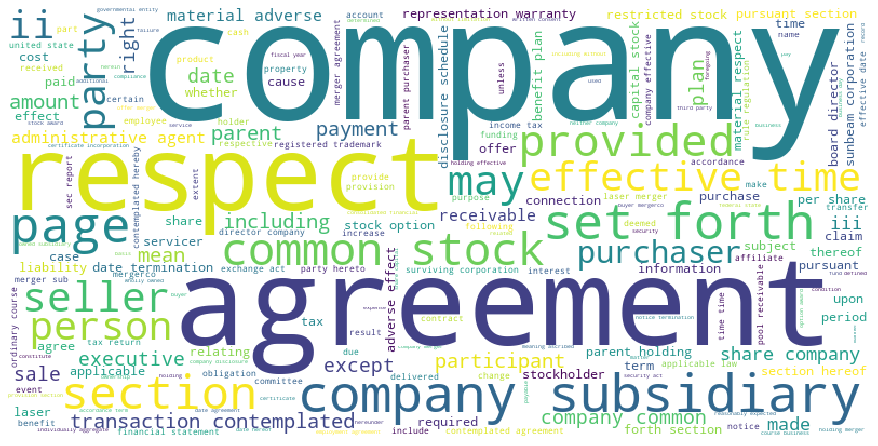

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud=corpus
cloud=WordCloud(background_color='white',width=800, height=400).generate(cloud)
plt.figure(figsize=(12,6),facecolor = None)
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### DataFraming of Words

In [25]:
corpus0=word_count(corpus)
words_occurrence=pd.DataFrame(corpus0.items(),columns=['Words','No. of occurrence'])
words_occurrence.head()

,Words,No. of occurrence
0,begin,8
1,privacy,2
2,enhanced,2
3,message,2
4,proc,1


#### Compairing Article Words and Word Dictionary

In [26]:
dictionary=pd.read_excel('uncertainty_dictionary.xlsx')
dictionary.to_csv('word2.csv')

In [27]:
word1=pd.read_csv('word.csv')
word2=pd.read_csv('word2.csv')

In [28]:
word1=word1.drop('Unnamed: 0',axis=1)
word2=word2.drop('Unnamed: 0',axis=1)

#### Verify Frequescy of Words Matching

In [29]:
word2['Word'].isin(word1['Words']).value_counts()

False    234
True      63
Name: Word, dtype: int64

#### Matching Words with Index 

In [30]:
word2['low_high_value']=pd.Series(word2['Word'].isin(word1['Words']))
word2[word2['low_high_value']==True].head()

,Word,low_high_value
3,ALTERATION,True
12,ANTICIPATE,True
13,ANTICIPATED,True
14,ANTICIPATES,True
18,APPARENT,True
